__Title:__ Capstone Project: All Methods

__Authors:__ Will Butler, Robert (Reuven) Derner 

In [ ]:
# Import data from github (next phase)
# url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv'
# data = pd.read_csv(url, encoding = "utf-8")

In [ ]:
# Create a DataFrame from the data
#df = pd.read_csv(file_path, encoding = "utf-8")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [ ]:
#file_path = 'C:\\Users\\19405\\Downloads\\final_project(5).csv'
#df = pd.read_csv(file_path)

In [ ]:
#import pandas as pd
#import requests
#from io import BytesIO

In [1]:
#New import from full python file
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'C:/Users/19405/OneDrive/Documents/GitHub/MSDS_Capstone/MSDS_6120_Capstone_ARW/transposed_power_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


C:\Users\19405\AppData\Local\Temp\ipykernel_15296\1415640744.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,01/01/07,314608.6399,00:00:00,01/01/07 00:00:00 Coal
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,01/01/07,314608.6399,00:15:00,01/01/07 00:15:00 Coal
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,01/01/07,314608.6399,00:30:00,01/01/07 00:30:00 Coal
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.70059,Coal,01/01/07,314608.6399,00:45:00,01/01/07 00:45:00 Coal
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,01/01/07,314608.6399,01:00:00,01/01/07 01:00:00 Coal


In [2]:
from datetime import datetime, timedelta
import numpy as np


date_std = df.replace(to_replace='/', value='-', regex=True)


# Convert 'Date' column to datetime objects
date_std['Date'] = pd.to_datetime(date_std['Date'])

# Convert back to the desired string format 'mm-dd-yy'
date_std['Date'] = date_std['Date'].dt.strftime('%m-%d-%y')

#get the number of rows
n = len(date_std)

#count to 101 then repeat
count_column = [(i % 101) + 1 for i in range(n)]

#create a new column for the count
date_std['Day_Count'] = count_column

#need to drop 97 - 101

#label records that need to be dropped
date_std['drop?'] = np.where(date_std['Day_Count'] > 96, 'Y', 'N')

#update these drop? so that the daylight savings records are not dropped 
dls = [
    '03-11-07', '11-04-07',
    '03-09-08', '11-02-08',
    '03-08-09', '11-01-09',
    '03-14-10', '11-07-10',
    '03-13-11', '11-06-11',
    '03-11-12', '11-04-12',
    '03-10-13', '11-03-13',
    '03-09-14', '11-02-14',
    '03-08-15', '11-01-15',
    '03-13-16', '11-06-16',
    '03-12-17', '11-05-17',
    '03-11-18', '11-04-18',
    '03-10-19', '11-03-19',
    '03-08-20', '11-01-20',
    '03-14-21', '11-07-21',
    '03-13-22', '11-06-22'
]

date_std.loc[date_std['Date'].isin(dls), 'drop?'] = 'N'

# drop records with drop? value of N
filtered_df = date_std[date_std['drop?'] != 'Y']

filtered_df.to_csv('clean_power_data.csv', index=True)

In [3]:
filtered_df.head()

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Day_Count,drop?
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,01-01-07,314608.6399,00:00:00,01-01-07 00:00:00 Coal,1,N
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,01-01-07,314608.6399,00:15:00,01-01-07 00:15:00 Coal,2,N
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,01-01-07,314608.6399,00:30:00,01-01-07 00:30:00 Coal,3,N
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.70059,Coal,01-01-07,314608.6399,00:45:00,01-01-07 00:45:00 Coal,4,N
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,01-01-07,314608.6399,01:00:00,01-01-07 01:00:00 Coal,5,N


In [4]:
df = filtered_df

In [5]:
#Lets examine nulls pre join

In [6]:
df.shape

(4423116, 9)

In [7]:
df.describe()

,Daily MWH,Day_Count
count,4.423116e+06,4.423116e+06
mean,1.143679e+05,4.851439e+01
std,1.736586e+05,2.772048e+01
min,-2.997269e+03,1.000000e+00
25%,1.575370e+03,2.500000e+01
50%,5.594327e+04,4.900000e+01
75%,1.832773e+05,7.300000e+01
max,2.216785e+07,1.010000e+02


In [8]:
df.isnull().sum()

HashedIndex       0
Demand         2140
Fuel             96
Date             96
Daily MWH         0
Time             96
Combined          0
Day_Count         0
drop?             0
dtype: int64

Index(['HashedIndex', 'Demand', 'Fuel', 'Date', 'Daily MWH', 'Time',
       'Combined', 'Day_Count', 'drop?'],
      dtype='object')


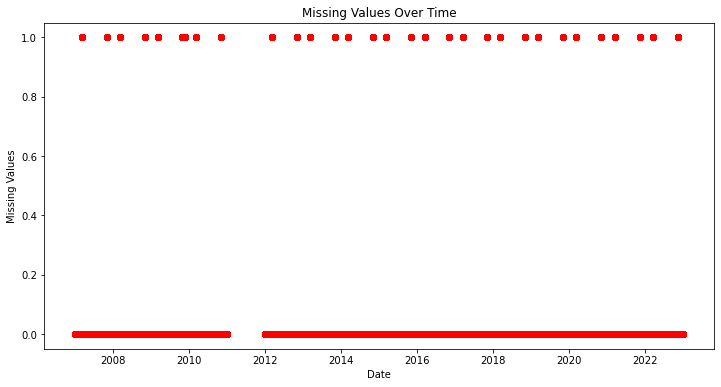

The code block took 8.0859 seconds to execute.


In [9]:
import matplotlib.pyplot as plt
import time

# Record the start time
start_time = time.time()

# Assuming your DataFrame is named 'df' and has columns 'date' and the column with missing values
# Replace these column names with your actual column names

# Print the column names to verify
print(df.columns)

# Create a DataFrame containing True for missing values and False for non-missing values
missing_values_df = df[['Date', 'Demand']].copy()
missing_values_df['missing'] = missing_values_df['Demand'].isnull()

# Convert the 'date' column to datetime type if it's not already
missing_values_df['Date'] = pd.to_datetime(missing_values_df['Date'])

# Set 'date' as the index
missing_values_df.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(missing_values_df.index, missing_values_df['missing'], marker='o', linestyle='None', color='red')
plt.title('Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Missing Values')
plt.show()


# Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f'The code block took {elapsed_time:.4f} seconds to execute.')

C:\Users\19405\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


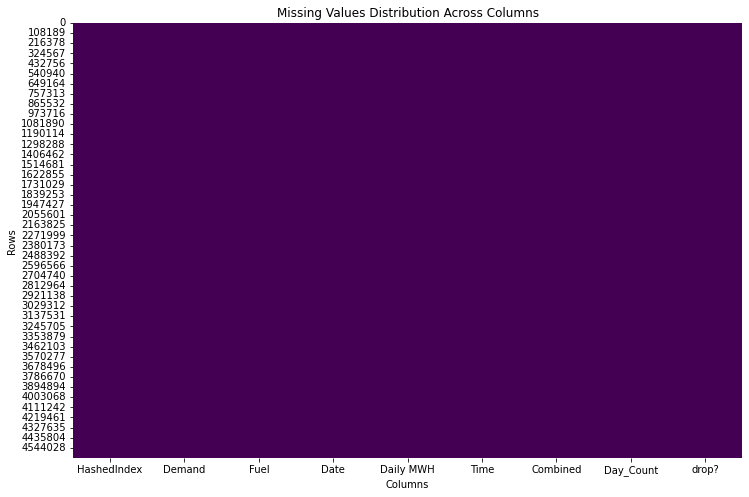

The code block took 29.8700 seconds to execute.


In [10]:
import seaborn as sns

# Record the start time
start_time = time.time()

# Create a DataFrame containing True for missing values and False for non-missing values
missing_values_df = df.isnull()

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_values_df, cmap='viridis', cbar=False)

# Show the plot
plt.title('Missing Values Distribution Across Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f'The code block took {elapsed_time:.4f} seconds to execute.')

In [11]:
# Record the start time
start_time = time.time()


# Create a DataFrame containing True for missing values and False for non-missing values
missing_values_df = df[['Date', 'Demand']].copy()
missing_values_df['missing'] = missing_values_df['Demand'].isnull()

# Convert the 'date' column to datetime type if it's not already
missing_values_df['Date'] = pd.to_datetime(missing_values_df['Date'])

# Group by date and count the missing values
missing_values_by_date = missing_values_df.groupby('Date')['missing'].sum()

# Print the results
print("Date\t\tNumber of Missing Values")
print("-----------------------------------")
for date, missing_count in missing_values_by_date.items():
    print(f"{date}\t{missing_count}")

# Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f'The code block took {elapsed_time:.4f} seconds to execute.')

Date		Number of Missing Values
-----------------------------------
2007-01-01 00:00:00	0
2007-01-02 00:00:00	0
2007-01-03 00:00:00	0
2007-01-04 00:00:00	0
2007-01-05 00:00:00	0
2007-01-06 00:00:00	0
2007-01-07 00:00:00	0
2007-01-08 00:00:00	0
2007-01-09 00:00:00	0
2007-01-10 00:00:00	0
2007-01-11 00:00:00	0
2007-01-12 00:00:00	0
2007-01-13 00:00:00	0
2007-01-14 00:00:00	0
2007-01-15 00:00:00	0
2007-01-16 00:00:00	0
2007-01-17 00:00:00	0
2007-01-18 00:00:00	0
2007-01-19 00:00:00	0
2007-01-20 00:00:00	0
2007-01-21 00:00:00	0
2007-01-22 00:00:00	0
2007-01-23 00:00:00	0
2007-01-24 00:00:00	0
2007-01-25 00:00:00	0
2007-01-26 00:00:00	0
2007-01-27 00:00:00	0
2007-01-28 00:00:00	0
2007-01-29 00:00:00	0
2007-01-30 00:00:00	0
2007-01-31 00:00:00	0
2007-02-01 00:00:00	0
2007-02-02 00:00:00	0
2007-02-03 00:00:00	0
2007-02-04 00:00:00	0
2007-02-05 00:00:00	0
2007-02-06 00:00:00	0
2007-02-07 00:00:00	0
2007-02-08 00:00:00	0
2007-02-09 00:00:00	0
2007-02-10 00:00:00	0
2007-02-11 00:00:00	0
2007-02-1

In [12]:
# Specify the path to your Excel file
excel_file_path = 'C:/Users/19405/Downloads/Capstone_Weather_Data_Long_Format.xlsx'

# Specify the sheet name
sheet_name = 'Combined'

# Use pandas to read the Excel file and create a DataFrame from a specific sheet
df_weather = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Display the DataFrame
df_weather.head()

,Date,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,Dew Point Avg Dallas North Central,Dew Point Min Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,2007-01-01,2007,1,1,52.0,41.3,34,29,27.0,25,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
1,2007-01-02,2007,1,2,53.0,42.9,35,31,26.8,24,...,85,65.5,45,9,6.7,5,27.3,27.3,27.2,0.0
2,2007-01-03,2007,1,3,53.0,45.4,36,45,33.8,0,...,100,85.7,70,20,7.2,0,27.2,27.1,27.0,0.0
3,2007-01-04,2007,1,4,53.0,48.7,46,48,45.6,44,...,100,77.8,19,22,10.1,0,27.0,26.9,26.6,0.0
4,2007-01-05,2007,1,5,61.0,52.1,48,50,47.6,44,...,79,46.6,17,28,12.9,0,26.9,26.8,26.7,0.0


In [13]:
#### Combine the data

# Conver the date fields to a common format
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format = '%m/%d/%y')

In [14]:
# Assuming df is your DataFrame with a date column 'Date'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display the DataFrame to inspect the changes
print(df)

                                               HashedIndex       Demand  \
0        f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...  3376.329577   
1        ede6098380c10e48d944288c220849403128f8752402f4...  3368.077206   
2        be6c8a673a21a9c147a33b75f67679120aa352334e59ba...  3365.003007   
3        8643933102baf47f748061b6375c2c8f94020317879c88...   3364.70059   
4        062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...  3337.219223   
...                                                    ...          ...   
4652151  fc3f65e9f87bfc0b73940ea169d701be2c173a1056f8cf...  5613.644307   
4652152  47cdcf87c0cb08237f50fc47321f7a40b77daf67c259be...  5509.516104   
4652153  3e3d10ece9bf434136f51b638608e7272f9cafd33bbfa0...  5489.178341   
4652154  2a74ada5ab6b6460ace4092beb2fe74fe34f9b35d0f0d9...  5450.046703   
4652155  9b0cc2759501c23c4e00267e464881461c981fb5ca0559...  5506.060958   

          Fuel       Date      Daily MWH      Time                Combined  \
0         Coal 2007-0

C:\Users\19405\AppData\Local\Temp\ipykernel_15296\471570686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [15]:
# Perform the join on the common date field
merged_df = pd.merge(df, df_weather, on='Date')

# Display the merged DataFrame
merged_df.head(10)

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Day_Count,drop?,Year,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01-01-07 00:00:00 Coal,1,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.6399,00:15:00,01-01-07 00:15:00 Coal,2,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,2007-01-01,314608.6399,00:30:00,01-01-07 00:30:00 Coal,3,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.70059,Coal,2007-01-01,314608.6399,00:45:00,01-01-07 00:45:00 Coal,4,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,2007-01-01,314608.6399,01:00:00,01-01-07 01:00:00 Coal,5,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
5,93db4b152121430df2aaf08474827ded51dc11bd9ac017...,3340.401121,Coal,2007-01-01,314608.6399,01:15:00,01-01-07 01:15:00 Coal,6,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
6,e28bce99fca3d2f0b0be924c7aceb2c6c7a223f7e7537b...,3338.779986,Coal,2007-01-01,314608.6399,01:30:00,01-01-07 01:30:00 Coal,7,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
7,fa2eec7020d3bd8f622fa6fb3052d3841bfef869f5aa01...,3341.014301,Coal,2007-01-01,314608.6399,01:45:00,01-01-07 01:45:00 Coal,8,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
8,1d0c60b90133960c9ddfbb738e6ff906de67359712d09c...,3375.998789,Coal,2007-01-01,314608.6399,02:00:00,01-01-07 02:00:00 Coal,9,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
9,bd9362b3332309859bea7e8028f3b57e64008d2978f374...,3353.998083,Coal,2007-01-01,314608.6399,02:15:00,01-01-07 02:15:00 Coal,10,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0


We still likely need to cut demand by the incriments of time for total deamn

### Examine the data

In [16]:
merged_df.shape

(4423020, 140)

__Missing Values__  
The dataset contains significant portion of missing values throughout the dataset, we will need to use various methods for imputation of the missing values.

In [17]:
merged_df.isnull().sum()

HashedIndex                                0
Demand                                  2044
Fuel                                       0
Date                                       0
Daily MWH                                  0
                                        ... 
Wind Speed Min Midland Far West            0
Pressures Inch Max Midland Far West        0
Pressure InchAvg Midland Far West          0
Pressure Inch Min Midland Far West         0
Precipitation Total Midland Far West       0
Length: 140, dtype: int64

In [18]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(merged_df[merged_df.columns[merged_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / merged_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent
0,Demand,2044,0.05


deamand is the only file with missing data, not sure why, might as well jsut drop those records its less than 1% of the data

In [19]:
merged_df.describe()

,Daily MWH,Day_Count,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,Dew Point Avg Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
count,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,...,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06,4.423020e+06
mean,1.138892e+05,4.851439e+01,2.015296e+03,6.526145e+00,1.572951e+01,7.743664e+01,6.783225e+01,5.882478e+01,5.742623e+01,5.219268e+01,...,7.591422e+01,5.174770e+01,2.810286e+01,1.966156e+01,1.094555e+01,3.090854e+00,2.711228e+01,2.700255e+01,2.679107e+01,2.417073e-02
std,1.400056e+05,2.772048e+01,4.481967e+00,3.450697e+00,8.801200e+00,1.640779e+01,1.608440e+01,1.666855e+01,1.504339e+01,1.628020e+01,...,1.685397e+01,1.756938e+01,1.676223e+01,6.359542e+00,3.771589e+00,3.407424e+00,1.627532e-01,4.151754e-01,1.973519e+00,1.468116e-01
min,-2.997269e+03,1.000000e+00,2.007000e+03,1.000000e+00,1.000000e+00,1.400000e+01,9.500000e+00,0.000000e+00,1.000000e+00,-3.000000e+00,...,1.000000e+01,5.700000e+00,0.000000e+00,6.000000e+00,1.400000e+00,0.000000e+00,2.640000e+01,1.620000e+01,0.000000e+00,0.000000e+00
25%,1.575370e+03,2.500000e+01,2.012000e+03,4.000000e+00,8.000000e+00,6.600000e+01,5.580000e+01,4.500000e+01,4.700000e+01,3.950000e+01,...,6.400000e+01,3.890000e+01,1.700000e+01,1.500000e+01,8.200000e+00,0.000000e+00,2.700000e+01,2.690000e+01,2.680000e+01,0.000000e+00
50%,5.594327e+04,4.900000e+01,2.016000e+03,7.000000e+00,1.600000e+01,7.900000e+01,6.980000e+01,6.100000e+01,6.200000e+01,5.620000e+01,...,7.800000e+01,4.980000e+01,2.500000e+01,1.800000e+01,1.050000e+01,3.000000e+00,2.710000e+01,2.700000e+01,2.690000e+01,0.000000e+00
75%,1.832332e+05,7.300000e+01,2.019000e+03,1.000000e+01,2.300000e+01,9.100000e+01,8.170000e+01,7.400000e+01,7.000000e+01,6.670000e+01,...,9.000000e+01,6.350000e+01,3.600000e+01,2.300000e+01,1.330000e+01,6.000000e+00,2.720000e+01,2.710000e+01,2.700000e+01,0.000000e+00
max,6.997708e+05,1.010000e+02,2.022000e+03,1.200000e+01,3.100000e+01,1.110000e+02,9.710000e+01,8.800000e+01,8.200000e+01,7.530000e+01,...,1.000000e+02,9.890000e+01,9.300000e+01,6.600000e+01,2.930000e+01,2.000000e+01,2.780000e+01,2.770000e+01,2.760000e+01,2.470000e+00


In [20]:
merged_df.head()

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Day_Count,drop?,Year,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.6399,00:00:00,01-01-07 00:00:00 Coal,1,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.6399,00:15:00,01-01-07 00:15:00 Coal,2,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,2007-01-01,314608.6399,00:30:00,01-01-07 00:30:00 Coal,3,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.70059,Coal,2007-01-01,314608.6399,00:45:00,01-01-07 00:45:00 Coal,4,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,2007-01-01,314608.6399,01:00:00,01-01-07 01:00:00 Coal,5,N,2007,...,88,65.0,41,13,8.0,3,27.3,27.3,27.2,0.0


In [21]:
#See the dataframes datatypes
df.dtypes

HashedIndex            object
Demand                 object
Fuel                   object
Date           datetime64[ns]
Daily MWH             float64
Time                   object
Combined               object
Day_Count               int64
drop?                  object
dtype: object

In [22]:
#Make Demand back to a float character
merged_df['Demand'] = merged_df['Demand'].astype(float)

#Errors in conversions, need to identify where

ValueError: could not convert string to float: '1-0-1900 0:00'

In [23]:
search_value = '1-0-1900 0:00'
search_column = 'Demand'

In [24]:
result_df = merged_df[merged_df[search_column] == search_value]
result_df.count()

HashedIndex                             7
Demand                                  7
Fuel                                    7
Date                                    7
Daily MWH                               7
                                       ..
Wind Speed Min Midland Far West         7
Pressures Inch Max Midland Far West     7
Pressure InchAvg Midland Far West       7
Pressure Inch Min Midland Far West      7
Precipitation Total Midland Far West    7
Length: 140, dtype: int64

In [25]:
#Lets remove these records before proceeding with the rest of the EDA 
mask = merged_df['Demand'] == search_value
imp_df = merged_df[-mask]

In [26]:
#lets convert the object to float again

#Make Demand back to a float character
imp_df['Demand'] = imp_df['Demand'].astype(float)

C:\Users\19405\AppData\Local\Temp\ipykernel_15296\2248115389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_df['Demand'] = imp_df['Demand'].astype(float)


In [27]:
imp_df.isnull().sum()

HashedIndex                                0
Demand                                  2044
Fuel                                       0
Date                                       0
Daily MWH                                  0
                                        ... 
Wind Speed Min Midland Far West            0
Pressures Inch Max Midland Far West        0
Pressure InchAvg Midland Far West          0
Pressure Inch Min Midland Far West         0
Precipitation Total Midland Far West       0
Length: 140, dtype: int64

In [28]:
imp_df = imp_df.dropna()

In [29]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(imp_df[imp_df.columns[imp_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / imp_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent


### We've handled all the dupes, lets go into correlations now

In [30]:
# List of columns to convert to float
#columns_to_convert = ['Temp Max', 'Temp Avg',
#       'TempMin', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
#       'Humidity Percent Max', 'Humidity Percent Avg', 'Humidity Percent Min',
#       'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
#       'Pressures Inch Max', 'Pressure InchAvg', 'Pressure Inch Min',
#       'Precipitation Total']

# Convert the specified columns to float
#merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)

### Examine any Correlations 

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [32]:
correlation_matrix = imp_df.corr()

In [33]:
correlation_matrix

,Demand,Daily MWH,Day_Count,Year,Month,Day,Temp Max Dallas North Central,Temp Avg Dallas North Central,TempMin Dallas North Central,Dew Point Max Dallas North Central,...,Humidity Percent Max Midland Far West,Humidity Percent Avg Midland Far West,Humidity Percent Min Midland Far West,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West
Demand,1.000000,0.956457,0.071608,-0.018282,0.019331,-0.001880,0.072634,0.077758,0.079497,0.063402,...,-0.000124,0.001866,0.007288,-0.003648,-0.003703,0.002307,-0.025833,-0.009511,-0.003823,-0.000228
Daily MWH,0.956457,1.000000,-0.000060,-0.019116,0.020341,-0.002029,0.075973,0.081317,0.083122,0.066307,...,-0.000073,0.001986,0.007625,-0.003846,-0.003896,0.002405,-0.026996,-0.009924,-0.003983,-0.000216
Day_Count,0.071608,-0.000060,1.000000,-0.000246,0.000470,-0.000222,-0.000190,-0.000201,-0.000222,-0.000132,...,-0.000075,-0.000072,-0.000082,-0.000210,-0.000226,-0.000128,0.000105,-0.000222,-0.000196,0.000027
Year,-0.018282,-0.019116,-0.000246,1.000000,-0.001080,-0.000365,0.020989,0.024672,0.015539,0.020814,...,-0.068719,-0.047239,-0.015421,0.029984,0.075631,0.064991,0.154747,0.119514,0.058913,0.090478
Month,0.019331,0.020341,0.000470,-0.001080,1.000000,0.010080,0.185590,0.192608,0.189987,0.186019,...,0.105985,0.128182,0.133430,-0.156754,-0.171776,-0.082111,0.035720,0.018724,0.004903,0.019096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wind Speed Min Midland Far West,0.002307,0.002405,-0.000128,0.064991,-0.082111,-0.021064,0.107369,0.125612,0.130499,0.132422,...,-0.112700,-0.046275,0.027262,0.371701,0.688846,1.000000,-0.199066,-0.073558,-0.004456,-0.042252
Pressures Inch Max Midland Far West,-0.025833,-0.026996,0.000105,0.154747,0.035720,-0.038034,-0.488924,-0.501344,-0.493246,-0.550498,...,0.094272,0.203054,0.267312,-0.263327,-0.273099,-0.199066,1.000000,0.386201,0.089443,0.014862
Pressure InchAvg Midland Far West,-0.009511,-0.009924,-0.000222,0.119514,0.018724,-0.018126,-0.176035,-0.175938,-0.167419,-0.210377,...,0.032339,0.093556,0.135014,-0.128506,-0.127417,-0.073558,0.386201,1.000000,0.785498,0.020656
Pressure Inch Min Midland Far West,-0.003823,-0.003983,-0.000196,0.058913,0.004903,-0.009854,-0.035471,-0.033794,-0.031006,-0.042026,...,0.003216,0.027584,0.055897,-0.023022,-0.020063,-0.004456,0.089443,0.785498,1.000000,-0.001948


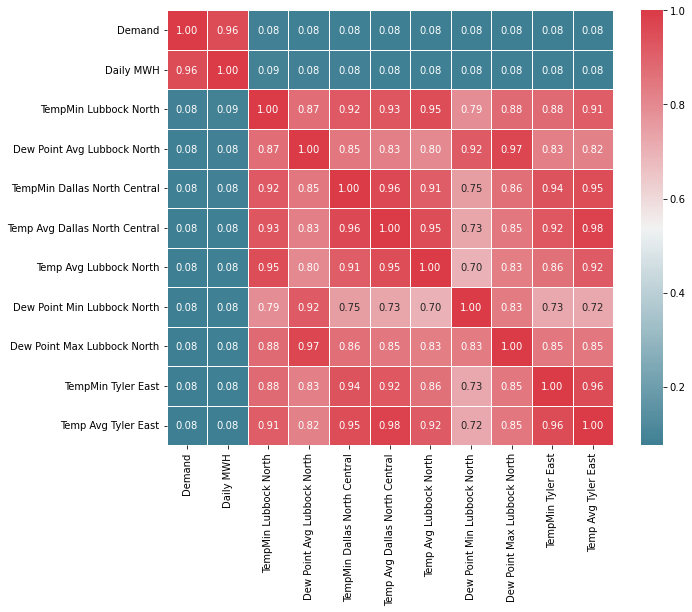

In [34]:
# Select correlations above 0.4 or below -0.4 for the target variable
target_corr = correlation_matrix['Demand']
target_corr = target_corr[(target_corr > 0.075) | (target_corr < -0.70)].sort_values(ascending=False)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros((len(target_corr), len(target_corr)))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Customize the color palette if desired
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap for the selected correlations
sns.heatmap(correlation_matrix.loc[target_corr.index, target_corr.index], 
            annot=True, fmt=".2f", cmap=cmap, mask=mask, linewidths=.5)


plt.show()

There are a number of correlations now that we have refitted the dataframe across vs long, there is a high degree of correlation among the dw point and the temperature data across Texas, however that is a likely scenario.

## EDA Exploratory Data Analysis

In [35]:
#Visualize the distribution of the target variable

#ax = sns.countplot(x='Demand', data=merged_df)
#plt.title('Distribution of Demand Feature')

# Add annotations for the count of each class

#for p in ax.patches:
#    count = p.get_height()
#    ax.annotate(f'{count:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Format y-axis labels with commas

#ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

#plt.show()


In [36]:
#Calculate new demand and MWH fields for the dataframe 

# Combine 'date' and 'Time' into a single datetime column
imp_df['Timestamp'] = pd.to_datetime(imp_df['Date'].astype(str) + ' ' + imp_df['Time'].astype(str))

# Calculate total demand for each day
daily_total_demand = imp_df.groupby('Day')['Demand'].sum()

# Merge the total demand back to the original dataframe
imp_df = imp_df.merge(daily_total_demand, left_on='Day', right_index=True, suffixes=('', '_daily'))

# Calculate the demand percentage for each 15-minute interval
imp_df['demand_percentage'] = imp_df['Demand'] / imp_df['Demand_daily']

In [37]:
imp_df

,HashedIndex,Demand,Fuel,Date,Daily MWH,Time,Combined,Day_Count,drop?,Year,...,Wind Speed Max Midland Far West,Wind Speed Avg Midland Far West,Wind Speed Min Midland Far West,Pressures Inch Max Midland Far West,Pressure InchAvg Midland Far West,Pressure Inch Min Midland Far West,Precipitation Total Midland Far West,Timestamp,Demand_daily,demand_percentage
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,Coal,2007-01-01,314608.639900,00:00:00,01-01-07 00:00:00 Coal,1,N,2007,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:00:00,1.700479e+08,0.000020
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,Coal,2007-01-01,314608.639900,00:15:00,01-01-07 00:15:00 Coal,2,N,2007,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:15:00,1.700479e+08,0.000020
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,Coal,2007-01-01,314608.639900,00:30:00,01-01-07 00:30:00 Coal,3,N,2007,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:30:00,1.700479e+08,0.000020
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.700590,Coal,2007-01-01,314608.639900,00:45:00,01-01-07 00:45:00 Coal,4,N,2007,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 00:45:00,1.700479e+08,0.000020
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,Coal,2007-01-01,314608.639900,01:00:00,01-01-07 01:00:00 Coal,5,N,2007,...,13,8.0,3,27.3,27.3,27.2,0.0,2007-01-01 01:00:00,1.700479e+08,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423015,fc3f65e9f87bfc0b73940ea169d701be2c173a1056f8cf...,5613.644307,Wind,2022-12-31,447799.542082,22:45:00,2022-12-3122:45:00Wind,92,N,2022,...,29,15.7,6,27.0,26.9,26.9,0.0,2022-12-31 22:45:00,1.011146e+08,0.000056
4423016,47cdcf87c0cb08237f50fc47321f7a40b77daf67c259be...,5509.516104,Wind,2022-12-31,447799.542082,23:00:00,2022-12-3123:00:00Wind,93,N,2022,...,29,15.7,6,27.0,26.9,26.9,0.0,2022-12-31 23:00:00,1.011146e+08,0.000054
4423017,3e3d10ece9bf434136f51b638608e7272f9cafd33bbfa0...,5489.178341,Wind,2022-12-31,447799.542082,23:15:00,2022-12-3123:15:00Wind,94,N,2022,...,29,15.7,6,27.0,26.9,26.9,0.0,2022-12-31 23:15:00,1.011146e+08,0.000054
4423018,2a74ada5ab6b6460ace4092beb2fe74fe34f9b35d0f0d9...,5450.046703,Wind,2022-12-31,447799.542082,23:30:00,2022-12-3123:30:00Wind,95,N,2022,...,29,15.7,6,27.0,26.9,26.9,0.0,2022-12-31 23:30:00,1.011146e+08,0.000054


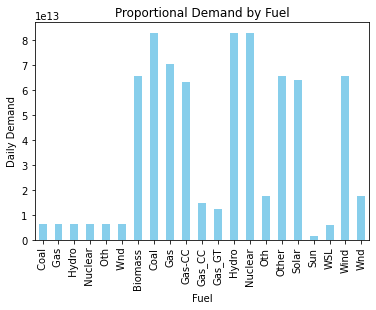

In [38]:
# Plot the bar chart
imp_df.groupby('Fuel')['Demand_daily'].sum().plot(kind='bar', color='skyblue')
plt.title('Proportional Demand by Fuel')
plt.xlabel('Fuel')
plt.ylabel('Daily Demand')
plt.show()

### Univariate Analysis

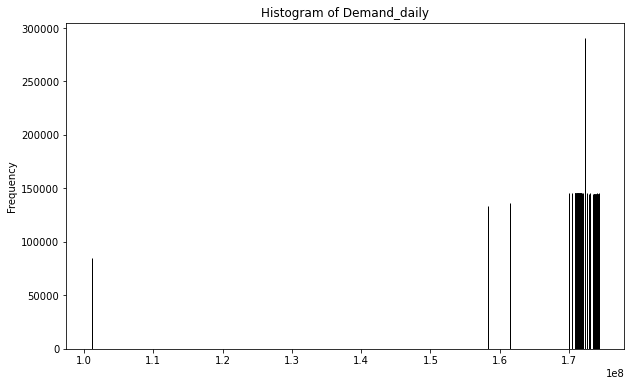

In [39]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Demand_daily'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Demand_daily')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

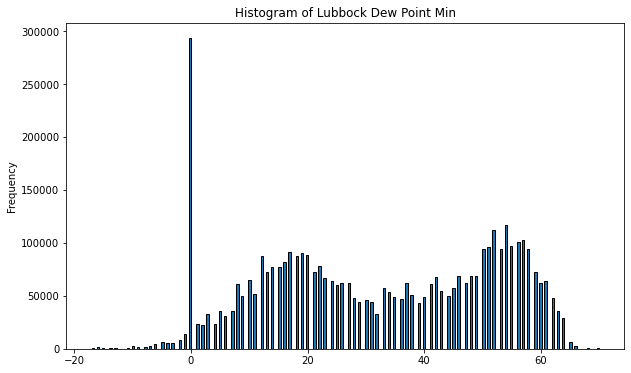

In [40]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Dew Point Min Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Lubbock Dew Point Min')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

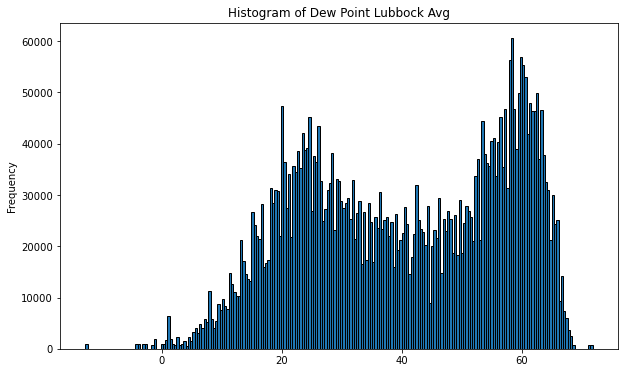

In [41]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Dew Point Avg Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Lubbock Avg')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

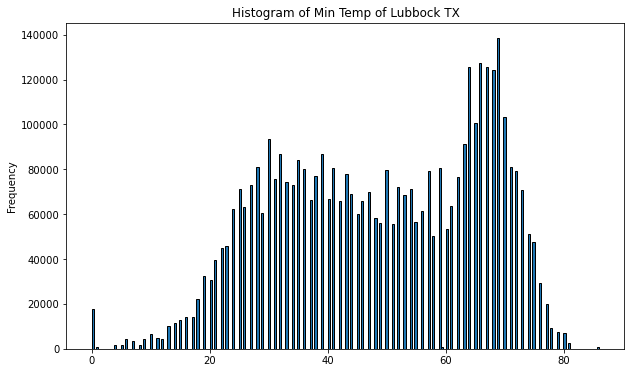

In [42]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['TempMin Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temp of Lubbock TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

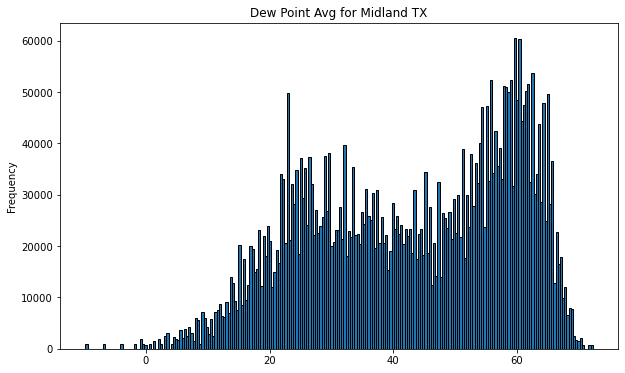

In [43]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Dew Point Avg Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Dew Point Avg for Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

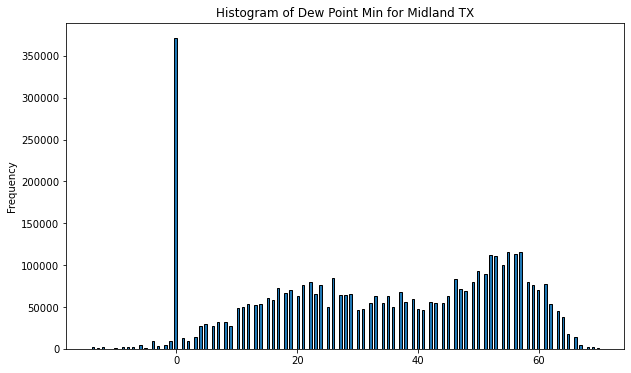

In [44]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Dew Point Min Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Min for Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

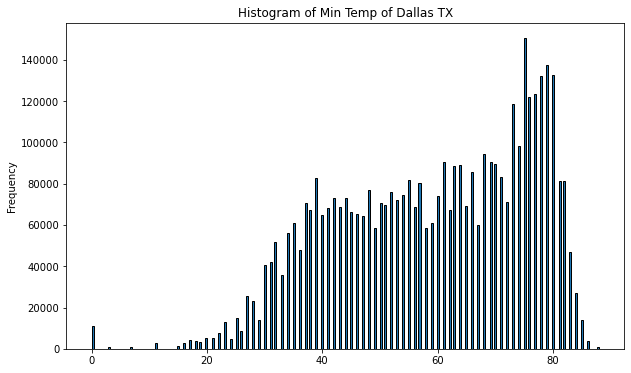

In [45]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['TempMin Dallas North Central'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temp of Dallas TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

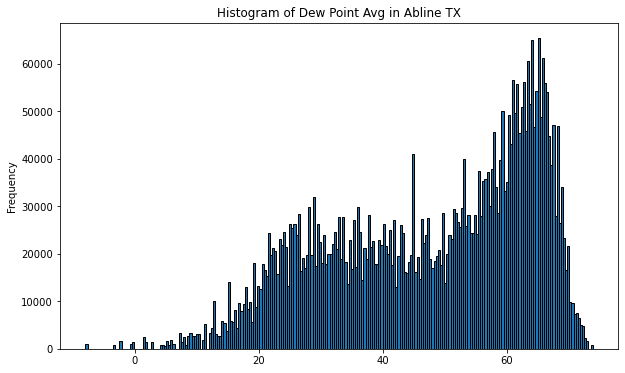

In [46]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Dew Point Avg Abilene West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Dew Point Avg in Abline TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

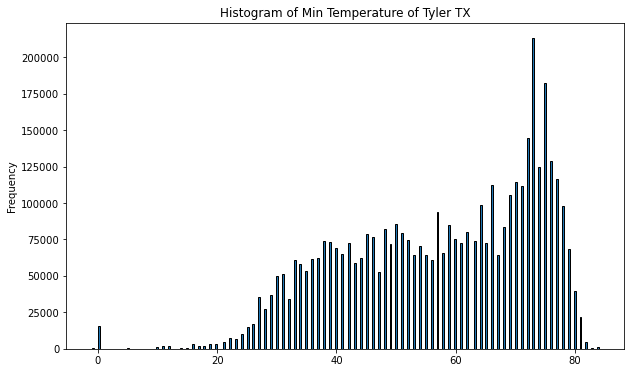

In [47]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['TempMin Tyler East'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Min Temperature of Tyler TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

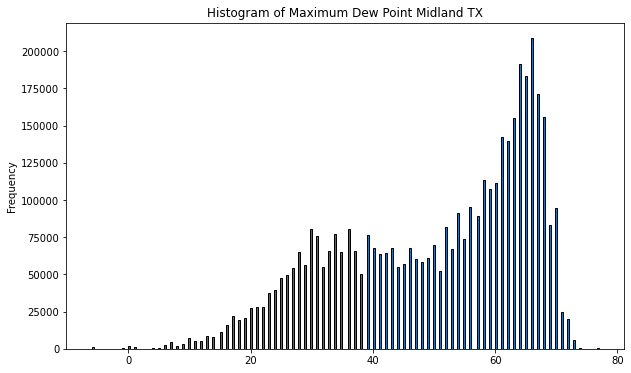

In [48]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Dew Point Max Midland Far West'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Maximum Dew Point Midland TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

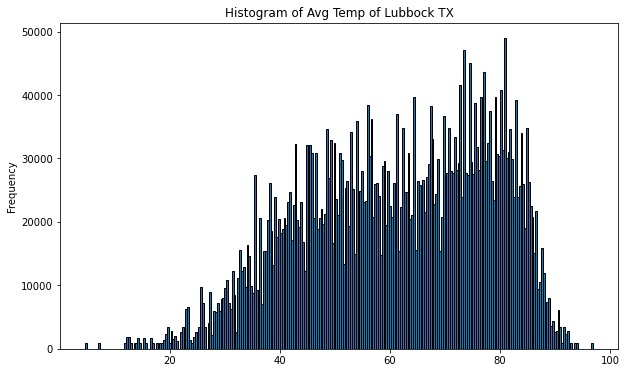

In [49]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(imp_df['Temp Avg Lubbock North'], bins='auto', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Avg Temp of Lubbock TX')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plotting the histogram
#plt.figure(figsize=(10, 6))
#sns.boxplot(df['x0'])  
#plt.title('Box & Whisker Plot of x0')
#plt.xlabel('x0')
#plt.ylabel('Values')
#plt.show()

In [69]:
# Plot the bar chart
# merged_df.groupby('Fuel')['ProportionalDemand'].sum().plot(kind='bar', color='skyblue')
#plt.title('Proportional Demand by Fuel')
#plt.xlabel('Fuel')
#plt.ylabel('Proportional Demand')
#plt.show()

### Imputation

In [50]:
# List of categorical columns to one-hot encode
categorical_columns = ['Fuel']#, 'Weather Station', 'ERCOT Region']

# Use pd.get_dummies to create dummy variables
imputation_df = pd.get_dummies(imp_df, columns=categorical_columns, prefix=categorical_columns)

imputation_df.head()

,HashedIndex,Demand,Date,Daily MWH,Time,Combined,Day_Count,drop?,Year,Month,...,Fuel_Gas_GT,Fuel_Hydro,Fuel_Nuclear,Fuel_Oth,Fuel_Other,Fuel_Solar,Fuel_Sun,Fuel_WSL,Fuel_Wind,Fuel_Wnd
0,f30e839570c87617aa4df1fc6a0b4d2ba27811c5f225a5...,3376.329577,2007-01-01,314608.6399,00:00:00,01-01-07 00:00:00 Coal,1,N,2007,1,...,0,0,0,0,0,0,0,0,0,0
1,ede6098380c10e48d944288c220849403128f8752402f4...,3368.077206,2007-01-01,314608.6399,00:15:00,01-01-07 00:15:00 Coal,2,N,2007,1,...,0,0,0,0,0,0,0,0,0,0
2,be6c8a673a21a9c147a33b75f67679120aa352334e59ba...,3365.003007,2007-01-01,314608.6399,00:30:00,01-01-07 00:30:00 Coal,3,N,2007,1,...,0,0,0,0,0,0,0,0,0,0
3,8643933102baf47f748061b6375c2c8f94020317879c88...,3364.700590,2007-01-01,314608.6399,00:45:00,01-01-07 00:45:00 Coal,4,N,2007,1,...,0,0,0,0,0,0,0,0,0,0
4,062914c5cf4d65b47050e75008fbd3ea78ba8a18f212a0...,3337.219223,2007-01-01,314608.6399,01:00:00,01-01-07 01:00:00 Coal,5,N,2007,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
print(imp_df.columns)

Index(['HashedIndex', 'Demand', 'Fuel', 'Date', 'Daily MWH', 'Time',
       'Combined', 'Day_Count', 'drop?', 'Year',
       ...
       'Wind Speed Max Midland Far West', 'Wind Speed Avg Midland Far West',
       'Wind Speed Min Midland Far West',
       'Pressures Inch Max Midland Far West',
       'Pressure InchAvg Midland Far West',
       'Pressure Inch Min Midland Far West',
       'Precipitation Total Midland Far West', 'Timestamp', 'Demand_daily',
       'demand_percentage'],
      dtype='object', length=143)


In [52]:
print(imp_df.dtypes)

HashedIndex                                     object
Demand                                         float64
Fuel                                            object
Date                                    datetime64[ns]
Daily MWH                                      float64
                                             ...      
Pressure Inch Min Midland Far West             float64
Precipitation Total Midland Far West           float64
Timestamp                               datetime64[ns]
Demand_daily                                   float64
demand_percentage                              float64
Length: 143, dtype: object


### Modeling 

#### Linear Regression

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error, explained_variance_score


# List of targets to drop
features_to_drop = ['HashedIndex','Combined','Demand','Demand_daily','demand_percentage','Time','Date','drop?','Timestamp']

# Split the data into features (X) and target variable (y)
X = imputation_df.drop(features_to_drop, axis=1)  # Remove the target variable from features
y = imputation_df['Demand_daily']
y2 = imputation_df['Demand']

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

In [61]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [63]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

Mean Squared Error: 83972602336415.23
Mean Absolute Error: 4365820.9945120625
R^2 Score: 0.18559629918658416
Root Mean Squared Error: 9163656.6029296
Explained Variance Score: 0.1855979502044518


Mean Squared Error (MSE):

Interpretation: MSE is the average of the squared differences between the predicted and actual values.
Your MSE: Approximately 174,554,389,809.92.
Implication: The squared nature of MSE means that larger errors contribute disproportionately more. In your case, the model's predictions have some relatively large errors, contributing to the overall MSE.
Mean Absolute Error (MAE):

Interpretation: MAE is the average of the absolute differences between the predicted and actual values.
Your MAE: Approximately 289,190.54.
Implication: MAE is more interpretable as it gives the average magnitude of errors. An MAE of 289,190.54 indicates, on average, your predictions deviate by this amount from the actual values.
R^2 Score (Coefficient of Determination):

Interpretation: R^2 measures the proportion of variance in the dependent variable explained by the independent variables.
Your R^2 Score: Approximately 0.56.
Implication: An R^2 of 0.56 means that your model explains 56% of the variance in the target variable. This suggests a moderate level of explanatory power, but there is room for improvement.
Root Mean Squared Error (RMSE):

Interpretation: RMSE is the square root of MSE and provides a measure of the average magnitude of errors.
Your RMSE: Approximately 417,797.07.
Implication: Like MSE, RMSE is sensitive to larger errors. An RMSE of 417,797.07 indicates the typical size of errors in your predictions.
Explained Variance Score:

Interpretation: This score is another measure of how well the model explains the variance in the target variable.
Your Explained Variance Score: Approximately 0.56.
Implication: Similar to R^2, it confirms that 56% of the variance in the target variable is captured by your model.
In summary, these metrics collectively suggest that your model has some predictive power (as indicated by R^2 and Explained Variance) but also exhibits some errors, especially in terms of the magnitude of predictions (as indicated by MSE, MAE, and RMSE). Further model refinement or feature engineering may help improve these metrics. Always consider the context of your specific problem domain when interpreting these metrics.

In [ ]:
# Linear Model 2

In [87]:
# Get the dictionary of local variables
%whos

Variable                   Type                       Data/Info
---------------------------------------------------------------
LinearRegression           ABCMeta                    <class 'sklearn.linear_mo<...>._base.LinearRegression'>
SGDRegressor               ABCMeta                    <class 'sklearn.linear_mo<...>c_gradient.SGDRegressor'>
StandardScaler             type                       <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                          DataFrame                               Daily MWH  D<...>20969 rows x 154 columns]
X2_test                    DataFrame                               Daily MWH  D<...>84194 rows x 154 columns]
X2_train                   DataFrame                               Daily MWH  D<...>36775 rows x 154 columns]
categorical_columns        list                       n=1
cmap                       LinearSegmentedColormap    <matplotlib.colors.Linear<...>ct at 0x0000018080A16B50>
column                     str              

In [79]:
# List of variable names to delete
variables_to_delete = ['X2', 'X2_test', 'X2_train', 'X_initial', 'X_remaining', 'X_test', 'X_train',
                       'correlation_matrix', 'daily_total_demand', 'date', 'date_std', 'df', 'df_weather',
                       'filtered_df', 'imp_df', 'merged_df', 'missing_values_by_date', 'missing_values_df',
                       'model', 'model2', 'model_inc', 'null_df', 'result_df', 'target_corr',
                       'y', 'y2_test', 'y2_train', 'y_initial', 'y_pred', 'y_remaining', 'y_test', 'y_train']

# Delete variables in the list
for var_name in variables_to_delete:
    if var_name in globals():
        del globals()[var_name]


In [84]:
pip install memory-profiler


In [85]:
# Load the memory profiler extension
%load_ext memory_profiler

# Your code with variable deletion
# ...

# Measure memory usage after deleting variables
%memit


peak memory: 8931.02 MiB, increment: 0.20 MiB


In [82]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=117)

In [83]:
# Create and train the linear regression model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

MemoryError: Unable to allocate 4.06 GiB for an array with shape (154, 3536775) and data type float64

In [ ]:
# Make predictions on the test set
y_pred2 = model.predict(X2_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y2_test, y2_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y2_test, y2_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y2_test, y2_pred)
print(f'R^2 Score: {r2}')

rmse = mean_squared_error(y2_test, y2_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

evs = explained_variance_score(y2_test, y2_pred)
print(f'Explained Variance Score: {evs}')

#### Time Series Models

#### Neural Network Models